# Notebook for perceptual salience of positive-Self

## Stimulus-coding HDDM for Matching task

This is the script for extracting posterior data, which is part of analysis in Hu, et al., 2019, Notebook for perceptual salience of positive-Self (https://osf.io/83dyj/). 

Before running this script, make sure that `Run_model_*.ipynb` had been run and the model data were save in the current folder.


This script decompose the RT and accuracy data into 4 parameters of DDM. The mean of each individual's parameter were then used for analysis of indivdual differences.

Run the script using Docker (no parallel is supported yet):

--------------------------------------------------------------------------------------------------------------
The HDDM used here is a docker image run on a 64-bit PC, with Ubuntu 20.04 system.

[Install docker](https://docs.docker.com/get-docker/).

Pull the HDDM docker image from the internet ( ~ 4.22 GB)

`docker pull hcp4715/hddm:example`

Run docker (with sudo permission)
```
docker run -it --rm \
-v /you_folder_of_data:/home/jovyan/hddm \
-p 8888:8888 hcp4715/hddm:example jupyter notebook
```

You will see an url appear in the terminal, right click and open that link, you shall see two folders in the jupyter notebook: `work`, `hddm`. The `hddm` is the folder linked to the folder you stored your data. 

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
Or you can set up a python env using conda using `hddm_env.yml`.

`conda env create -f hddm_env.yml`

--------------------------------------------------------------------------------------------------------------


Questions:

1. How to plot multiple chain to visually inspect the convergence (solved!);
2. Plot individual's PPC

In [1]:
import sys
print('Notebook is running:', sys.executable)           # check which python is in use.
from platform import python_version                     # further check your python version
print('The current python version is', python_version())
import hddm, IPython
print('The current HDDM version is', hddm.__version__) # 0.8.0
# Warning:`IPython.parallel` package has been deprecated since IPython 4.0. 
print('The current IPython version is', IPython.__version__) 

# If you are sure that conda is installed, also check the package that install
#!conda list  # list the conda

Notebook is running: /opt/conda/bin/python
The current HDDM version is 3.7.6
The current HDDM version is 0.8.0
The current IPython version is 7.15.0


/opt/conda/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
%matplotlib inline

import os, hddm, time, csv  # import packages
import kabuki 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import random
import seaborn as sns

## Extracting data and save

### Extract parameters for correlation analysis
Using a for loop to extract individual's parameter (MAP) and save.

In [3]:
list_e1 = ['df1a', 'df1b','df1c', 'df2','df6a']
list_e2 = ['df5']
list_e3 = ['df3a', 'df3b', 'df4a', 'df4b', 'df6b', 'df7a', 'df7b']
list_e = list_e1 + list_e2 + list_e3
# list_e

In [6]:
for exp_name in list_e:
    models = []
    for id in range(4):
        mname = exp_name + '_chain__vtaz_%i'%id
        # print(mname)
        print('Processing Model %i of'%id, exp_name)
        m = hddm.load(mname)
        models.append(m)
        
    R_hat_vtz = hddm.analyze.gelman_rubin(models) 
    
    R_hat_fname = exp_name + '_R_hat_vtaz.csv'
    # print(R_hat_fname)
    with open(R_hat_fname,'w') as f:
        w = csv.writer(f)
        w.writerows(R_hat_vtz.items())
        
    models_comb = kabuki.utils.concat_models(models)
    
    param_fname = exp_name + '_hddm_params.csv'
    # print(param_fname)
    subj_Data = models_comb.get_subj_nodes()
    subj_Data.head()
    subj_Data.to_csv(param_fname)

df1a_chain__vtaz_0
Processing Model 0 of df1a
df1a_chain__vtaz_1
Processing Model 1 of df1a
df1a_chain__vtaz_2
Processing Model 2 of df1a
df1a_chain__vtaz_3
Processing Model 3 of df1a
df1b_chain__vtaz_0
Processing Model 0 of df1b
df1b_chain__vtaz_1
Processing Model 1 of df1b
df1b_chain__vtaz_2
Processing Model 2 of df1b
df1b_chain__vtaz_3
Processing Model 3 of df1b
df1c_chain__vtaz_0
Processing Model 0 of df1c
df1c_chain__vtaz_1
Processing Model 1 of df1c
df1c_chain__vtaz_2
Processing Model 2 of df1c
df1c_chain__vtaz_3
Processing Model 3 of df1c
df2_chain__vtaz_0
Processing Model 0 of df2
df2_chain__vtaz_1
Processing Model 1 of df2
df2_chain__vtaz_2
Processing Model 2 of df2
df2_chain__vtaz_3
Processing Model 3 of df2
df6a_chain__vtaz_0
Processing Model 0 of df6a
df6a_chain__vtaz_1
Processing Model 1 of df6a
df6a_chain__vtaz_2
Processing Model 2 of df6a
df6a_chain__vtaz_3
Processing Model 3 of df6a
df5_chain__vtaz_0
Processing Model 0 of df5
df5_chain__vtaz_1
Processing Model 1 of df5


### Extract group-level parameters' trace for plotting

In [5]:
for exp_name in list_e:
    models = []
    for id in range(4):
        mname = exp_name + '_chain__vtaz_%i'%id
        # print(mname)
        print('Processing Model %i of'%id, exp_name)
        m = hddm.load(mname)
        models.append(m)
        
    df_grp_traces = []
    for i in range(4):
        df_m = models[i]
        df_grp_trace = df_m.get_group_traces()
        df_grp_trace['chain'] = i
        print('chain', i, df_grp_trace.shape)
        df_grp_traces.append(df_grp_trace)
    df_grp_traces = pd.concat(df_grp_traces)
    
    trace_fname = exp_name + '_group_traces.csv'
    df_grp_traces.to_csv(trace_fname, index=False) # save to csv

Processing Model 0 of df1a
Processing Model 1 of df1a
Processing Model 2 of df1a
Processing Model 3 of df1a
chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Processing Model 0 of df1b
Processing Model 1 of df1b
Processing Model 2 of df1b
Processing Model 3 of df1b
chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Processing Model 0 of df1c
Processing Model 1 of df1c
Processing Model 2 of df1c
Processing Model 3 of df1c
chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Processing Model 0 of df2
Processing Model 1 of df2
Processing Model 2 of df2
Processing Model 3 of df2
chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Processing Model 0 of df6a
Processing Model 1 of df6a
Processing Model 2 of df6a
Processing Model 3 of df6a
chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Processing Model 0 of df5
Processing Model 1 of df5
Processing Model 2 of df5
Proces

## Experiment 1a

Load the model data directly instead of running those code again.

In [3]:
# load all four chains and append into a list
df1a_models = []
for id in range(4):
    mname = 'df1a_chain__vtaz_%i'%id   # print('\nProcessing Model ', i)
    m_stim = hddm.load(mname)
    df1a_models.append(m_stim)

# Create a new model that has all traces concatenated of individual models.
df1a_models_comb = kabuki.utils.concat_models(df1a_models)

# df1a_models_comb.plot_posteriors()  # plot posterior of combined model

#### Get Gelman-Rubin index and save

In [4]:
Match_R_hat_vtz = hddm.analyze.gelman_rubin(df1a_models) # get the R hat information
Match_R_hat_vtz

# save Categ_R_hat_vtz
with open('df1a_R_hat_vtaz.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())

In [5]:
# get the individual node
subj_Data = df1a_models_comb.get_subj_nodes()
subj_Data.head()

subj_Data.to_csv(r'df1a_hddm_params.csv')

#### Extract group level posterior traces and save to csv

In [4]:
df1a_grp_traces = []
for i in range(4):
    df1a_m = df1a_models[0]
    df1a_grp_trace = df1a_m.get_group_traces()
    df1a_grp_trace['chain'] = i
    print('chain', i, df1a_grp_trace.shape)
    df1a_grp_traces.append(df1a_grp_trace)
df1a_grp_traces = pd.concat(df1a_grp_traces)    
# df1a_grp_traces.to_csv('df1a_group_traces.csv', index=False) # save to csv
# df1a_grp_traces.shape


chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)


In [5]:
df1a_grp_traces = df1a_models_comb.get_group_traces()
print(df1a_grp_traces.shape)
df1a_grp_traces.to_csv('df1a_group_traces.csv', index=False) # save to csv

(4000, 23)


#### Extract all traces and save to a compressed file

In [7]:
df1a_traces = []
for i in range(4):
    df1a_m = df1a_models[0]
    df1a_trace = df1a_m.get_traces()
    df1a_trace['chain'] = i
    print('chain', i, df1a_trace.shape)
    df1a_traces.append(df1a_trace)
df1a_traces = pd.concat(df1a_traces) 

df1a_traces.shape

# save a compressed
#compression_opts = dict(method='zip',
#                        archive_name='df1a_traces.csv') 
#df1a_traces.to_csv('df1a_traces.zip', index=False,
#          compression=compression_opts)

chain 0 (1000, 993)
chain 1 (1000, 993)
chain 2 (1000, 993)
chain 3 (1000, 993)


(4000, 993)

#### Get the group params and plot

In [25]:
import re

lst = ["v(", "a(", "t(", 'cha']
esc_lst = [re.escape(s) for s in lst]
pattern = '|'.join(esc_lst)

# select v, a, t, and chains
slct_columns = df1a_grp_traces.columns[df1a_grp_traces.columns.str.contains(pattern, case=False)]

df_tmp = df1a_grp_traces[slct_columns]
df_tmp

,a(Match.Bad),a(Match.Good),a(Match.Neutral),a(Mismatch.Bad),a(Mismatch.Good),a(Mismatch.Neutral),v(Match.Bad),v(Match.Good),v(Match.Neutral),v(Mismatch.Bad),v(Mismatch.Good),v(Mismatch.Neutral),t(Match.Bad),t(Match.Good),t(Match.Neutral),t(Mismatch.Bad),t(Mismatch.Good),t(Mismatch.Neutral),chain
0,1.138712,1.271063,1.268046,1.213571,1.193390,1.189758,1.384414,2.274005,1.689633,2.020739,1.799753,1.844411,0.508381,0.457299,0.474781,0.527648,0.498036,0.505694,0
1,1.102245,1.302599,1.280733,1.201247,1.232074,1.209295,1.503735,2.382036,1.983424,2.332883,1.987371,2.085896,0.482354,0.468137,0.471191,0.514419,0.508208,0.492935,0
2,1.139217,1.272391,1.208857,1.179749,1.197469,1.147480,1.780488,2.269573,1.791361,2.071620,1.822116,1.765745,0.491759,0.470880,0.462974,0.502620,0.511922,0.510873,0
3,1.080554,1.306451,1.163629,1.216051,1.204544,1.245690,1.232903,2.227355,1.885109,1.911067,1.999446,1.842714,0.498689,0.459690,0.455230,0.529381,0.498436,0.491977,0
4,1.144938,1.353566,1.235325,1.210133,1.201224,1.235321,1.749291,2.357029,1.683275,2.214204,1.806486,1.944482,0.492230,0.468332,0.471146,0.507956,0.505156,0.512524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.182534,1.342772,1.278365,1.209289,1.190665,1.208825,1.725775,2.231168,1.860081,1.897198,1.825220,2.267496,0.484415,0.453090,0.465251,0.499217,0.514154,0.500704,3
996,1.132598,1.318828,1.275565,1.181291,1.196968,1.230493,1.274183,2.540937,1.941819,2.316315,2.060058,1.797511,0.497631,0.451592,0.438705,0.520504,0.508999,0.517576,3
997,1.157358,1.274988,1.243620,1.237500,1.135295,1.193703,1.798432,2.334425,1.988673,2.166818,1.895782,2.026093,0.493427,0.471554,0.463554,0.518610,0.523191,0.503687,3
998,1.111632,1.289652,1.259542,1.194104,1.156337,1.196023,1.516463,2.474505,1.834909,1.841179,1.941970,1.958880,0.525427,0.480193,0.451808,0.511418,0.513781,0.479781,3


In [89]:
def plot_grp_trace(models, param):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    df_grp_traces = []
    for i in range(4):
        df_m = models[i]
        df_grp_trace = df_m.get_group_traces()
        df_grp_trace['chain'] = i
        print('chain', i, df_grp_trace.shape)
        df_grp_traces.append(df_grp_trace)
    df_grp_traces = pd.concat(df_grp_traces)
    
    # select the columns included that parameter
    filter_col = [col for col in df_grp_traces if col.startswith(param)]
    filter_col.append('chain') # add the chain column to the data
    
    #df_tmp = df_grp_traces[df_grp_traces.columns.intersection(filter_col)]
    df_tmp = df_grp_traces.loc[:,filter_col]
    df_tmp["sample_id"] = df_tmp.index
    
    df_melt = pd.melt(df_tmp,
                      id_vars=['sample_id', 'chain'],
                      value_vars=filter_col[:-1],
                      var_name='cond',
                      value_name='value')
    
    sns.set_palette("Set2")
    for indx, df_tmp in df_melt.groupby('cond'):

        fig, axs = plt.subplots(ncols=2,figsize=(20, 9))
        print(indx)

        sns.lineplot(x='sample_id', y='value', hue="chain", data=df_tmp, ax=axs[0], palette='Set2')

        sns.distplot(df_tmp.loc[df_tmp['chain'] == 0, 'value'], hist = False, kde = True,
                         kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '0')
        sns.distplot(df_tmp.loc[df_tmp['chain'] == 1, 'value'], hist = False, kde = True,
                         kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '1')
        sns.distplot(df_tmp.loc[df_tmp['chain'] == 2, 'value'], hist = False, kde = True,
                         kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '2')
        sns.distplot(df_tmp.loc[df_tmp['chain'] == 3, 'value'], hist = False, kde = True,
                         kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '3')

        #axs[0].set_ylim([0.5, 3])
        axs[0].set_title(indx, fontsize=20)
        #axs[1].set_xlim([0.5, 3])
        axs[1].set_title(indx, fontsize=20)
        plt.show()
    

chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
z_std


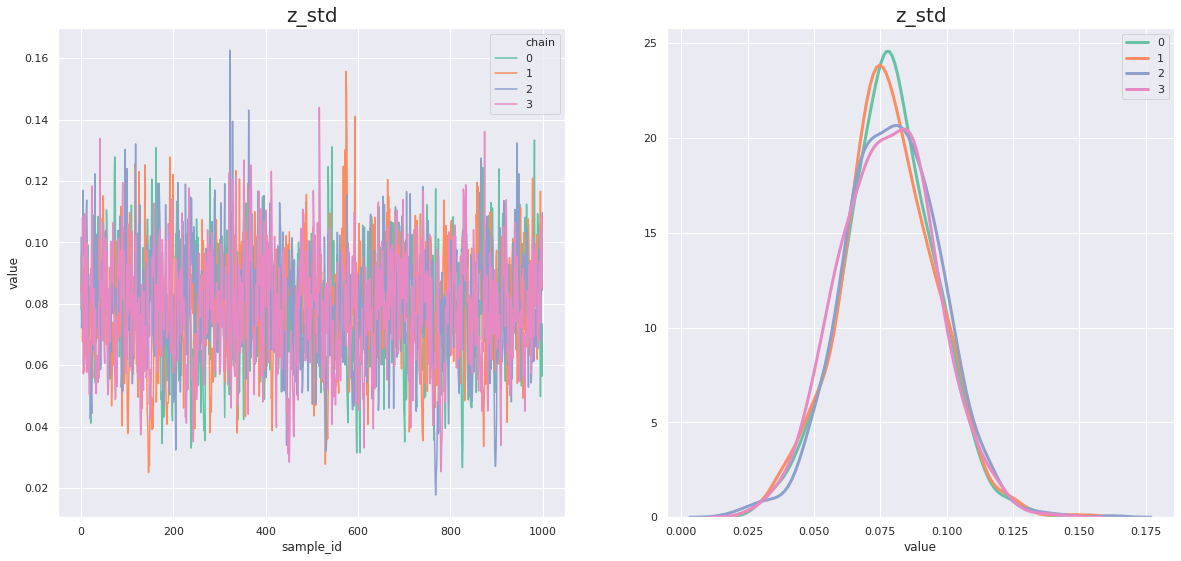

z_trans


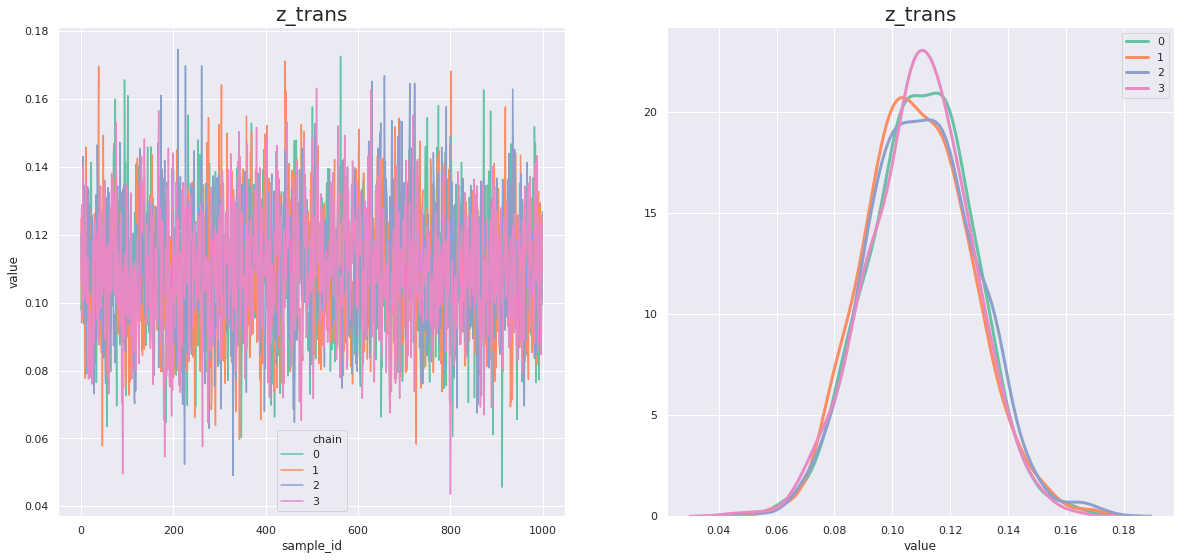

In [90]:
plot_grp_trace(models=df1a_models, param='z')

In [46]:
df1a_grp_traces.head(10)

,a(Match.Bad),a(Match.Good),a(Match.Neutral),a(Mismatch.Bad),a(Mismatch.Good),a(Mismatch.Neutral),a_std,v(Match.Bad),v(Match.Good),v(Match.Neutral),...,t(Match.Bad),t(Match.Good),t(Match.Neutral),t(Mismatch.Bad),t(Mismatch.Good),t(Mismatch.Neutral),t_std,z_trans,z_std,chain
0,1.138712,1.271063,1.268046,1.213571,1.193390,1.189758,0.158451,1.384414,2.274005,1.689633,...,0.508381,0.457299,0.474781,0.527648,0.498036,0.505694,0.084670,0.097788,0.078286,0
1,1.102245,1.302599,1.280733,1.201247,1.232074,1.209295,0.151475,1.503735,2.382036,1.983424,...,0.482354,0.468137,0.471191,0.514419,0.508208,0.492935,0.092479,0.114407,0.096553,0
2,1.139217,1.272391,1.208857,1.179749,1.197469,1.147480,0.145091,1.780488,2.269573,1.791361,...,0.491759,0.470880,0.462974,0.502620,0.511922,0.510873,0.079953,0.108808,0.098027,0
3,1.080554,1.306451,1.163629,1.216051,1.204544,1.245690,0.177338,1.232903,2.227355,1.885109,...,0.498689,0.459690,0.455230,0.529381,0.498436,0.491977,0.084872,0.105485,0.087054,0
4,1.144938,1.353566,1.235325,1.210133,1.201224,1.235321,0.179154,1.749291,2.357029,1.683275,...,0.492230,0.468332,0.471146,0.507956,0.505156,0.512524,0.085076,0.129114,0.070794,0
5,1.142238,1.326447,1.227564,1.208560,1.211059,1.195813,0.167295,1.654984,2.364582,2.098356,...,0.468930,0.464123,0.459972,0.527380,0.499442,0.483153,0.084718,0.128153,0.072254,0
6,1.083719,1.293106,1.226950,1.196407,1.162409,1.189548,0.146987,1.738501,2.504899,1.619807,...,0.483559,0.475009,0.493855,0.529300,0.508825,0.503736,0.083955,0.093676,0.076446,0
7,1.126703,1.282732,1.199793,1.239089,1.176612,1.255058,0.158771,1.681881,2.560911,1.927925,...,0.509387,0.489231,0.480849,0.492155,0.491348,0.498792,0.087186,0.099831,0.085895,0
8,1.153307,1.269632,1.212823,1.216996,1.167268,1.208340,0.138133,1.477914,2.341109,1.815014,...,0.498297,0.473493,0.474170,0.513215,0.492857,0.498670,0.076778,0.126465,0.097280,0
9,1.160584,1.267543,1.271653,1.178488,1.165216,1.228019,0.150101,1.816653,2.214384,1.758261,...,0.486657,0.470674,0.471770,0.525965,0.520794,0.503840,0.082607,0.111657,0.085671,0


v(Match.Bad)


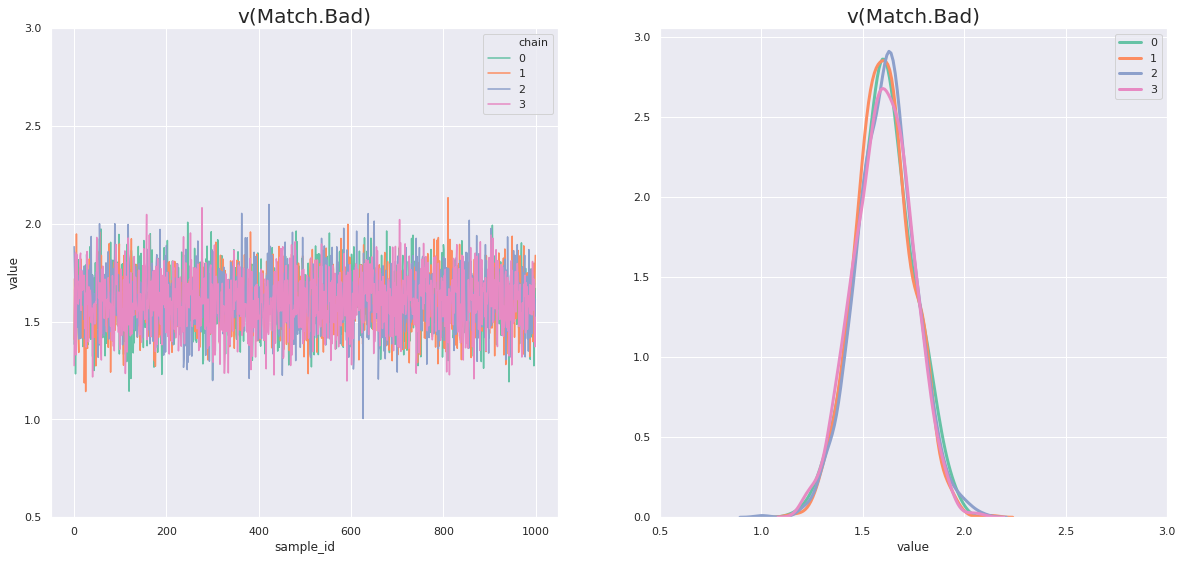

v(Match.Good)


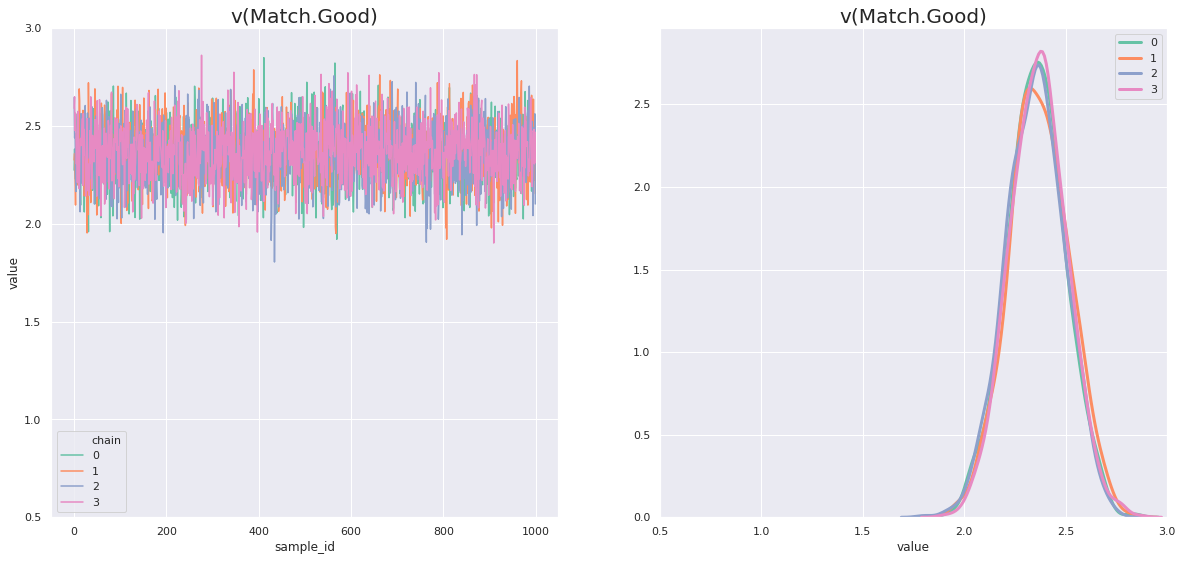

v(Match.Neutral)


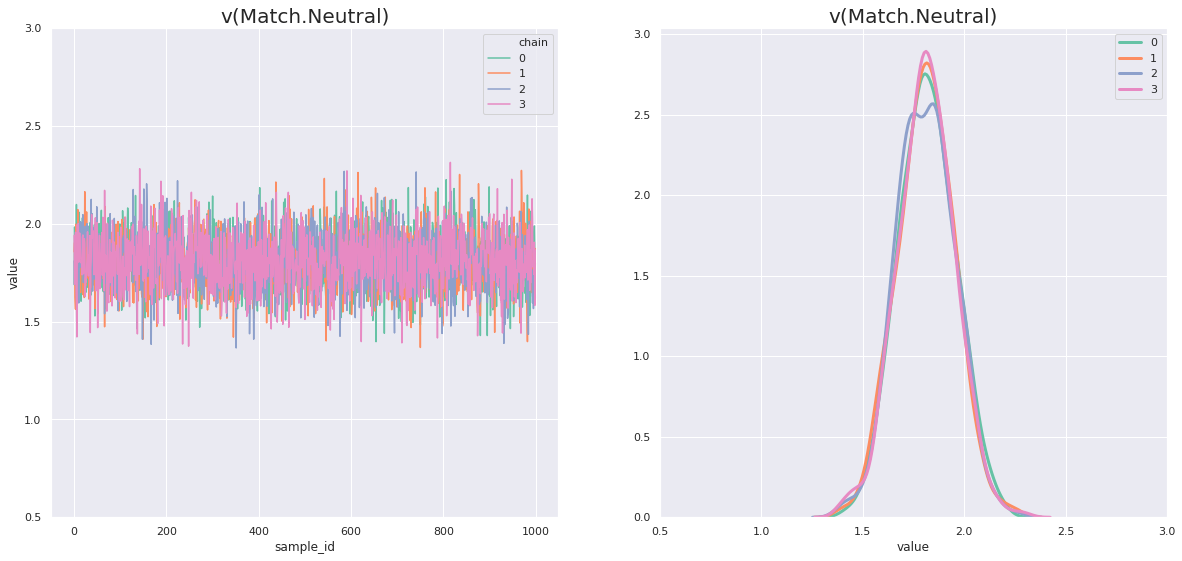

v(Mismatch.Bad)


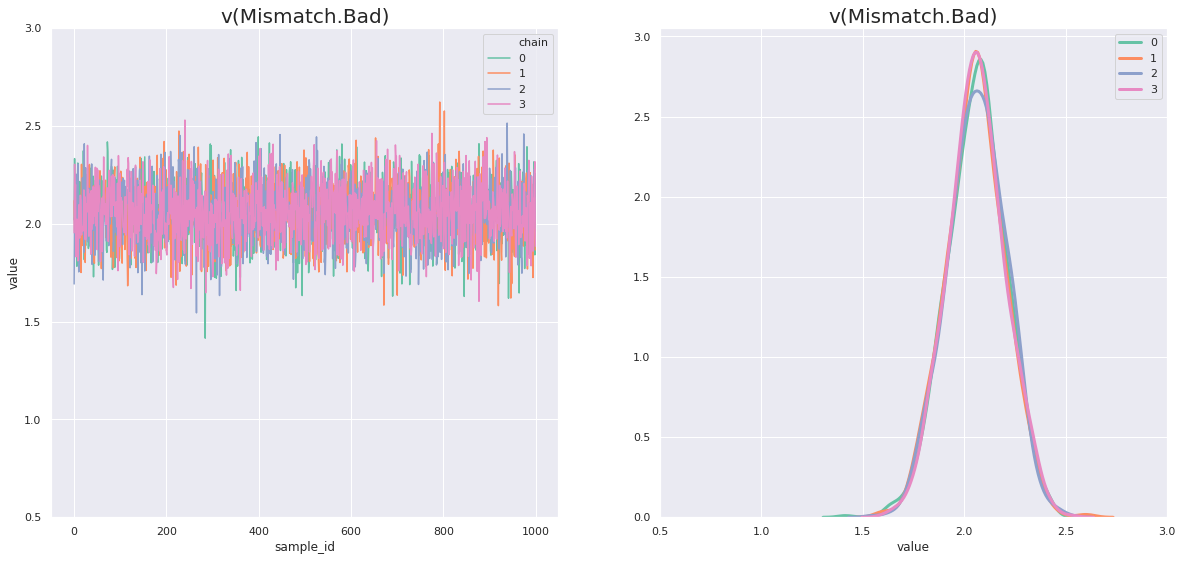

v(Mismatch.Good)


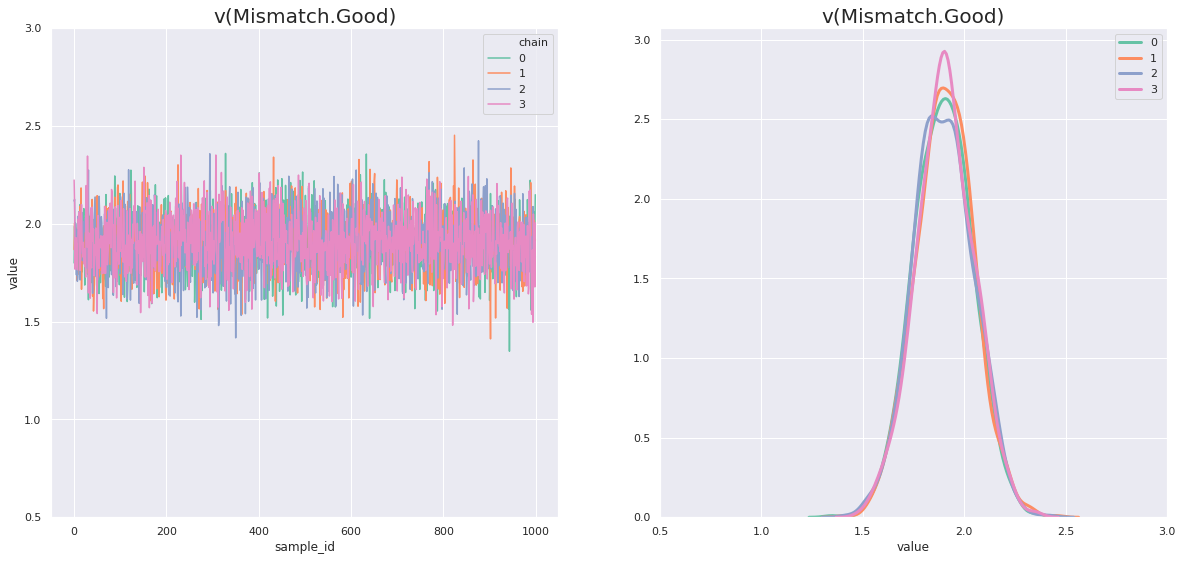

v(Mismatch.Neutral)


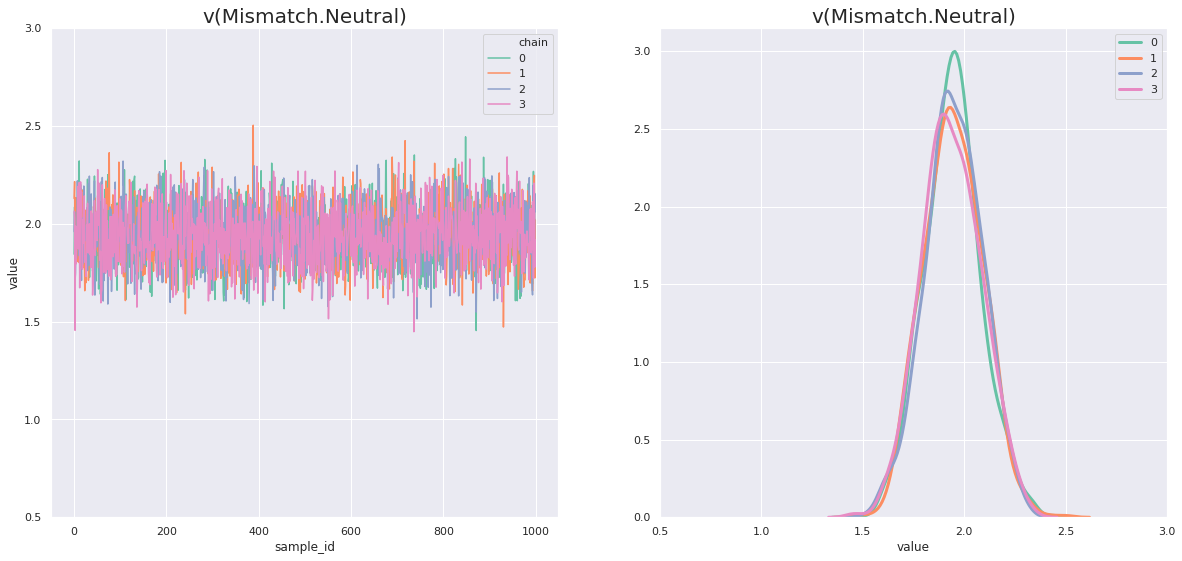

v_std


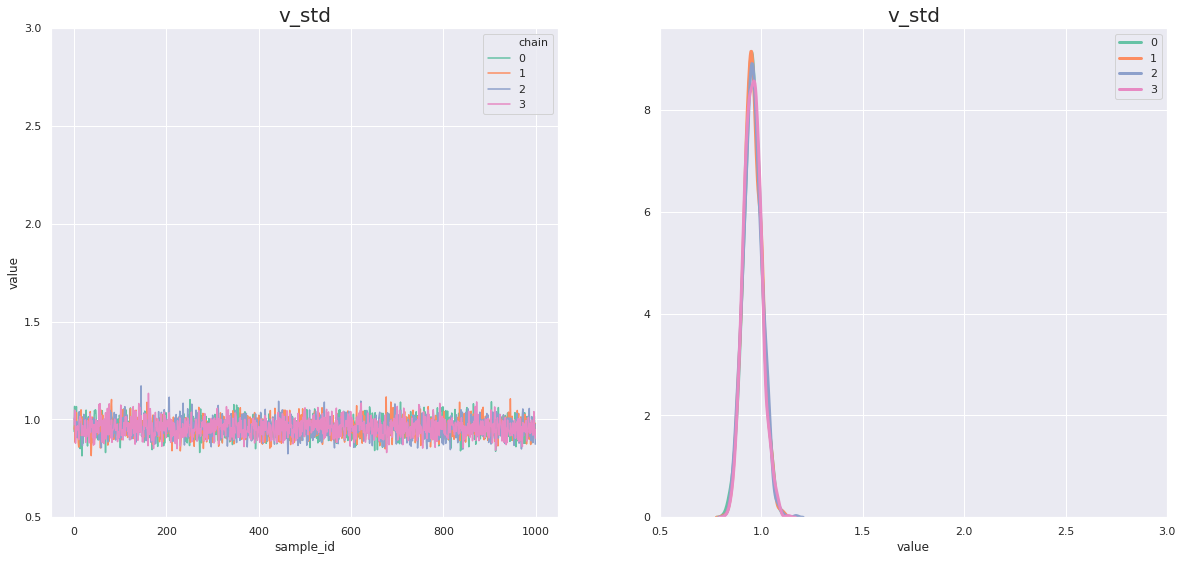

In [78]:
sns.set_palette("Set2")
for indx, df_tmp in df_melt.groupby('cond'):
    
    fig, axs = plt.subplots(ncols=2,figsize=(20, 9))
    print(indx)
    
    sns.lineplot(x='sample_id', y='value', hue="chain", data=df_tmp, ax=axs[0], palette='Set2')

    sns.distplot(df_tmp.loc[df_tmp['chain'] == 0, 'value'], hist = False, kde = True,
                     kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '0')
    sns.distplot(df_tmp.loc[df_tmp['chain'] == 1, 'value'], hist = False, kde = True,
                     kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '1')
    sns.distplot(df_tmp.loc[df_tmp['chain'] == 2, 'value'], hist = False, kde = True,
                     kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '2')
    sns.distplot(df_tmp.loc[df_tmp['chain'] == 3, 'value'], hist = False, kde = True,
                     kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1], label = '3')
    
    axs[0].set_ylim([0.5, 3])
    axs[0].set_title(indx, fontsize=20)
    axs[1].set_xlim([0.5, 3])
    axs[1].set_title(indx, fontsize=20)
    plt.show()
    #print(data)
    #break
#df_tmp = df_melt.loc[df_melt['cond'] == 'v(Match.Bad)']

#df_tmp.head()

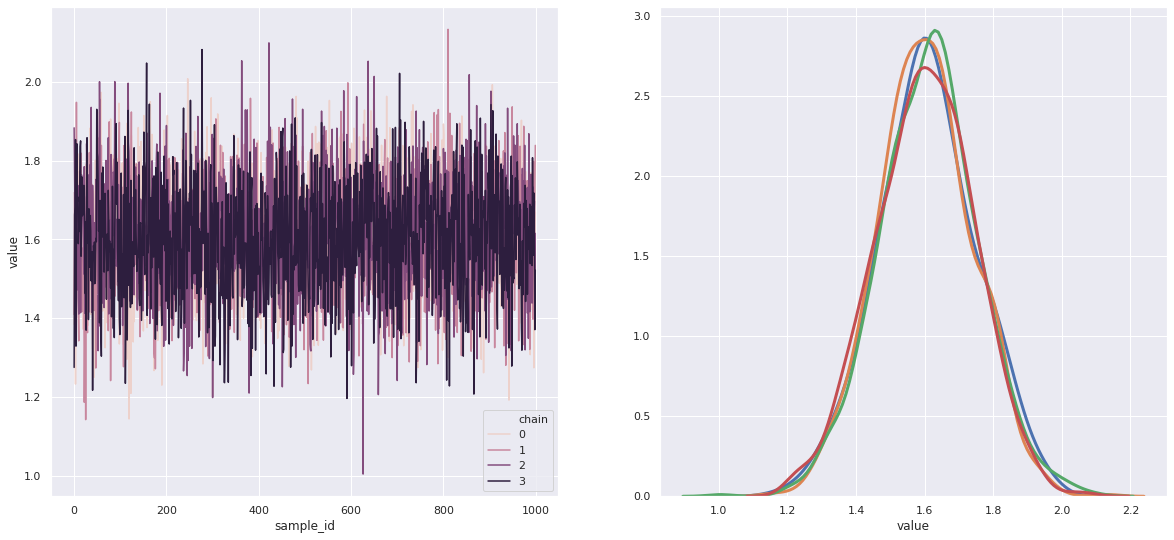

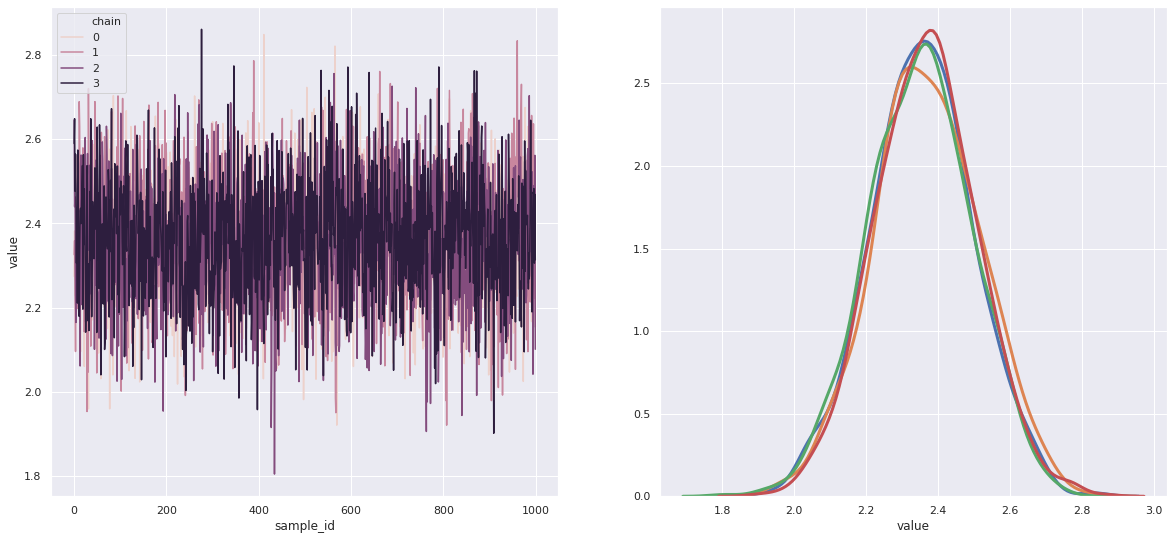

In [59]:
df_tmp = df_melt.loc[df_melt['cond'] == 'v(Match.Bad)']
fig, axs = plt.subplots(ncols=2,figsize=(20, 9))
sns.lineplot(x='sample_id', y='value', hue="chain", data=df_tmp, ax=axs[0])

sns.distplot(df_tmp.loc[df_tmp['chain'] == 0, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 1, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 2, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 3, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])

plt.show()

df_tmp = df_melt.loc[df_melt['cond'] == 'v(Match.Good)']
fig, axs = plt.subplots(ncols=2,figsize=(20, 9))
sns.lineplot(x='sample_id', y='value', hue="chain", data=df_tmp, ax=axs[0])

sns.distplot(df_tmp.loc[df_tmp['chain'] == 0, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 1, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 2, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])
sns.distplot(df_tmp.loc[df_tmp['chain'] == 3, 'value'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},ax=axs[1])

plt.show()

ValueError: estimator must be None when specifying units

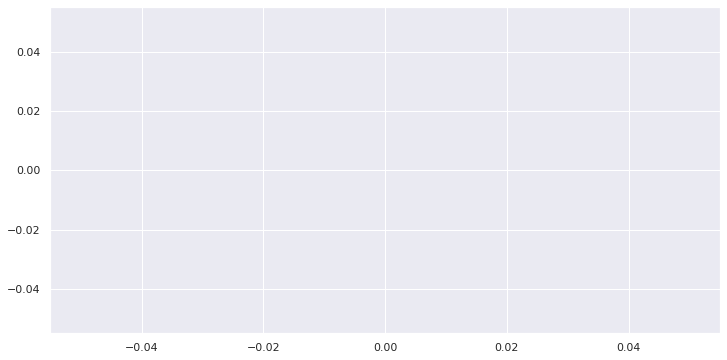

In [47]:
sns.lineplot(x='sample_id', y='value', hue="chain", units="cond", data=df_melt)

#### Reshape the data form wide to long for plotting

In [9]:
df_tmp["id"] = df_tmp.index
# df_tmp.head()
print('Shape of the wide format', df_tmp.shape)

df_melt = pd.melt(df_tmp,
                  id_vars=['id', 'chain'],
                  value_vars=slct_columns[:-1],
                  var_name='cond',
                  value_name='value')

#type(df_melt)
print('Shape of the long format', df_melt.shape)
df_melt.head()

Shape of the wide format (4000, 20)
Shape of the long format (72000, 4)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,chain,cond,value
0,0,0,a(Match.Bad),1.138712
1,1,0,a(Match.Bad),1.102245
2,2,0,a(Match.Bad),1.139217
3,3,0,a(Match.Bad),1.080554
4,4,0,a(Match.Bad),1.144938


In [10]:
# split the cond column into three columns
df_melt[['params','Matchness','Valence']] = pd.DataFrame(df_melt['cond'].apply(lambda x: [i for i in re.split(r'[\(\)\.]', x) if len(i)>0]).to_list())

# df_melt.head()

# change the 'cond' column
df_melt['cond'] = df_melt[['Matchness', 'Valence']].apply(lambda x: '_'.join(x), axis=1)
# df_melt.head(10)

# long-to-wide to plot pair-plot
tmp = df_melt
tmp['idx'] = np.tile(np.arange(0, df_melt.shape[0]/3), 3)
tmp = df_melt.pivot_table(index=['idx', 'Matchness', 'Valence', 'cond'], columns='params', values='value').reset_index()
#tmp = df_melt.pivot(index='idx', columns='params', values='value')

print(tmp.shape)
# tmp.head()

(24000, 7)


[None, None]

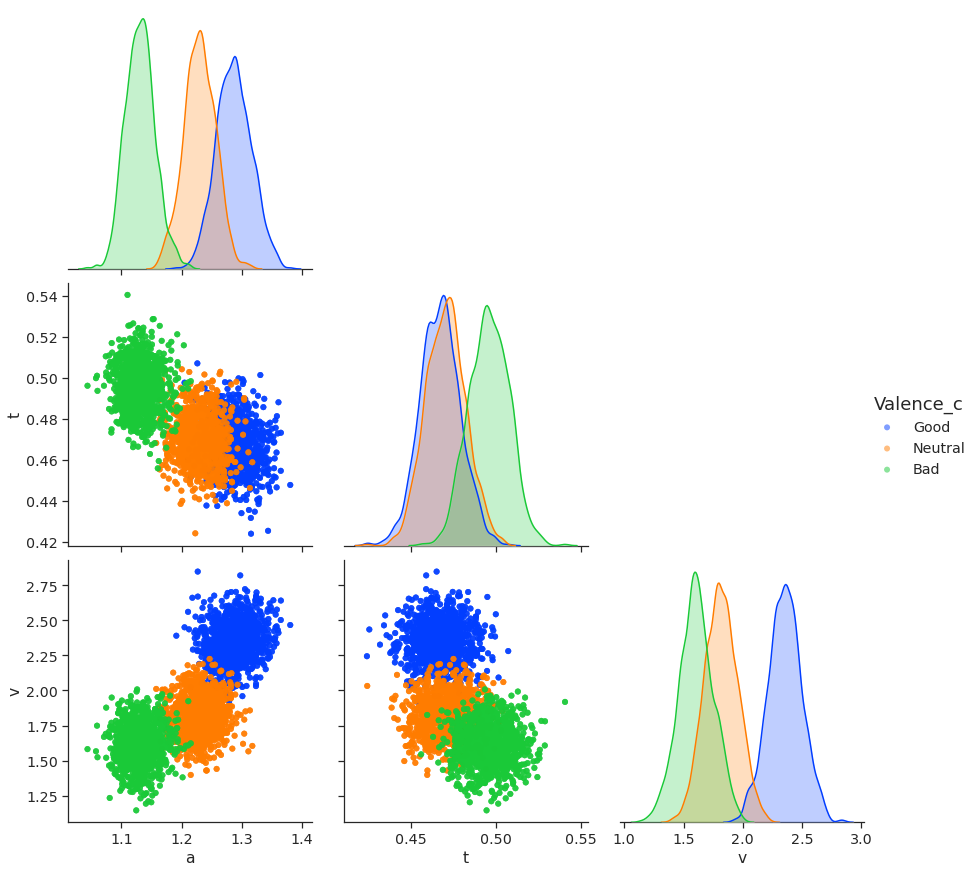

In [11]:
# pair plot
tmp_m = tmp[tmp['Matchness'] == 'Match']  # select matching trials
tmp_m = tmp_m.drop(columns=['idx','Matchness','cond'])
tmp_m['Valence_c'] = pd.Categorical(tmp_m['Valence'], categories=['Good', 'Neutral', 'Bad'])

sns.set(style="ticks", color_codes=True, font_scale=1.3)

g = sns.pairplot(tmp_m, hue="Valence_c", palette="bright", 
                 plot_kws=dict(edgecolor='none', alpha=0.5),
                 height = 4, corner=True) # or linewidth=0
plt.setp(g._legend.get_title(), fontsize=18)

In [13]:
# save the plot
g.savefig("exp1a_hddm_vta_pairplot.pdf")

## Experiment 1b

#### Check the convergence of MCMC

In [ ]:
# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(4):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_match,
                                 include='z', 
                                 stim_col='stim',
                                 depends_on={'v':['match','val','id'], 't':['match','val','id']},
                                 split_param='v',
                                 drift_criterion=False)
    
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())
    

### Load data

In [5]:
# load data
df1b = hddm.load_csv('df1b.v.hddm_stim.csv')

df1b.head(10)  # uncomment if you want to check the head of the data

,subj_idx,match,val,stim,response,rt
0,1101,Match,Good,1,1,0.776
1,1101,Match,Bad,1,1,0.987
2,1101,Mismatch,Bad,0,0,0.894
3,1101,Mismatch,Good,0,0,0.802
4,1101,Match,Neutral,1,1,1.053
5,1101,Mismatch,Neutral,0,0,0.889
6,1101,Match,Neutral,1,1,1.076
7,1101,Mismatch,Neutral,0,0,0.727
8,1101,Match,Good,1,1,0.675
9,1101,Mismatch,Good,0,0,0.878


There are 52 participant


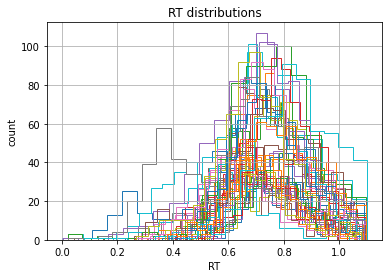

In [7]:
# Uncomment the codes below if you are interested in checking the distribution of raw data
# plot the distribution of raw data:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in df1b.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

print('There are %d participant' %df1b['subj_idx'].nunique())

In [8]:
# define a function to run model in parallel for experiment 1b
def run_model_1b(id):
    
    print('running model %i'%id);
    
    import hddm
    import random
    
    dbname='df1b_chain_vtaz_%i.db'%id   # define the database name, which uses pickle format
    mname = 'df1b_chain__vtaz_%i'%id    # define the name for the model
    
    df1b = hddm.load_csv('df1b.v.hddm_stim.csv')
    
    m = hddm.HDDMStimCoding(df1b, 
                            include='z', 
                            stim_col='stim', 
                            depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                            split_param='v', 
                            drift_criterion=False,
                            p_outlier=0.05)
    m.find_starting_values()
    m.sample(10000, burn=5000, dbname=dbname, db='pickle')
    m.save(mname) # save the model
    
    return m

In [9]:
start_time = time.time()   # the start time of the processing

from ipyparallel import Client

v = Client()[:]

jobs = v.map(run_model_1b, range(4)) # 4 is the number of chains
df1b_models = jobs.get()

print("\nRunning 4 chains used: %f seconds." % (time.time() - start_time))

# Running 4 chains used: 15342.325061 seconds.


Running 4 chains used: 15342.325061 seconds.


In [10]:
Match_R_hat_vtz = hddm.analyze.gelman_rubin(df1b_models) # get the R hat information

# save Categ_R_hat_vtz
with open('df1b_R_hat_vtaz.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())

In [11]:
df1b_grp_traces = []
for i in range(4):
    df1b_m = df1b_models[0]
    df1b_grp_trace = df1b_m.get_group_traces()
    df1b_grp_trace['chain'] = i
    print('chain', i, df1b_grp_trace.shape)
    df1b_grp_traces.append(df1b_grp_trace)
df1b_grp_traces = pd.concat(df1b_grp_traces)    
df1b_grp_traces.to_csv('df1a_group_traces.csv', index=False) # save to csv

chain 0 (5000, 24)
chain 1 (5000, 24)
chain 2 (5000, 24)
chain 3 (5000, 24)


In [12]:
import re

lst = ["v(", "a(", "t(", 'cha']
esc_lst = [re.escape(s) for s in lst]
pattern = '|'.join(esc_lst)

# select v, a, t, and chains
slct_columns = df1b_grp_traces.columns[df1b_grp_traces.columns.str.contains(pattern, case=False)]

df_tmp = df1b_grp_traces[slct_columns]
df_tmp.head()

,a(Match.Bad),a(Match.Good),a(Match.Neutral),a(Mismatch.Bad),a(Mismatch.Good),a(Mismatch.Neutral),v(Match.Bad),v(Match.Good),v(Match.Neutral),v(Mismatch.Bad),v(Mismatch.Good),v(Mismatch.Neutral),t(Match.Bad),t(Match.Good),t(Match.Neutral),t(Mismatch.Bad),t(Mismatch.Good),t(Mismatch.Neutral),chain
0,1.123048,1.303106,1.187505,1.225513,1.195271,1.193192,1.396718,2.188715,1.163827,1.850685,1.511123,1.664286,0.499841,0.455551,0.479585,0.537137,0.511371,0.497949,0
1,1.144181,1.289237,1.208940,1.214849,1.181688,1.147124,1.383972,2.122406,1.148205,1.828762,1.473658,1.480222,0.496086,0.451794,0.468285,0.481564,0.499840,0.502321,0
2,1.134392,1.253512,1.197616,1.222371,1.161849,1.172907,1.341558,2.214633,1.134973,1.849620,1.632115,1.618406,0.509560,0.420822,0.484708,0.507973,0.480131,0.509629,0
3,1.149123,1.234794,1.199081,1.211392,1.133689,1.169302,1.427866,2.176085,1.183502,1.704286,1.477849,1.571013,0.498767,0.459209,0.487619,0.544511,0.505498,0.501242,0
4,1.127177,1.254152,1.193641,1.204526,1.154924,1.173088,1.431471,2.088791,1.299137,2.004505,1.566851,1.543484,0.487265,0.458499,0.471735,0.548646,0.491245,0.503467,0


In [27]:
df_tmp["id"] = df_tmp.index
df_tmp.head()
print('Shape of the wide format', df_tmp.shape)

df_melt = pd.melt(df_tmp,
                  id_vars=['id', 'chain'],
                  value_vars=slct_columns[:-1],
                  var_name='cond',
                  value_name='value')

#type(df_melt)
print('Shape of the long format', df_melt.shape)
#print(df_melt.shape)
df_melt.head(10)

Shape of the wide format (20000, 20)
Shape of the long format (360000, 4)


/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,chain,cond,value
0,0,0,a(Match.Bad),1.123048
1,1,0,a(Match.Bad),1.144181
2,2,0,a(Match.Bad),1.134392
3,3,0,a(Match.Bad),1.149123
4,4,0,a(Match.Bad),1.127177
5,5,0,a(Match.Bad),1.105036
6,6,0,a(Match.Bad),1.132972
7,7,0,a(Match.Bad),1.110909
8,8,0,a(Match.Bad),1.117891
9,9,0,a(Match.Bad),1.143039


In [28]:
df_melt[['params','Matchness','Valence']] = pd.DataFrame(df_melt['cond'].apply(lambda x: [i for i in re.split(r'[\(\)\.]', x) if len(i)>0]).to_list())
df_melt.head()

,id,chain,cond,value,params,Matchness,Valence
0,0,0,a(Match.Bad),1.123048,a,Match,Bad
1,1,0,a(Match.Bad),1.144181,a,Match,Bad
2,2,0,a(Match.Bad),1.134392,a,Match,Bad
3,3,0,a(Match.Bad),1.149123,a,Match,Bad
4,4,0,a(Match.Bad),1.127177,a,Match,Bad


In [29]:
df_melt['params_c'] = pd.Categorical(df_melt['params'], categories=['v', 'a', 't'])
df_melt['Valence_c'] = pd.Categorical(df_melt['Valence'], categories=['Good', 'Neutral', 'Bad'])
df_melt.head()

,id,chain,cond,value,params,Matchness,Valence,params_c,Valence_c
0,0,0,a(Match.Bad),1.123048,a,Match,Bad,a,Bad
1,1,0,a(Match.Bad),1.144181,a,Match,Bad,a,Bad
2,2,0,a(Match.Bad),1.134392,a,Match,Bad,a,Bad
3,3,0,a(Match.Bad),1.149123,a,Match,Bad,a,Bad
4,4,0,a(Match.Bad),1.127177,a,Match,Bad,a,Bad


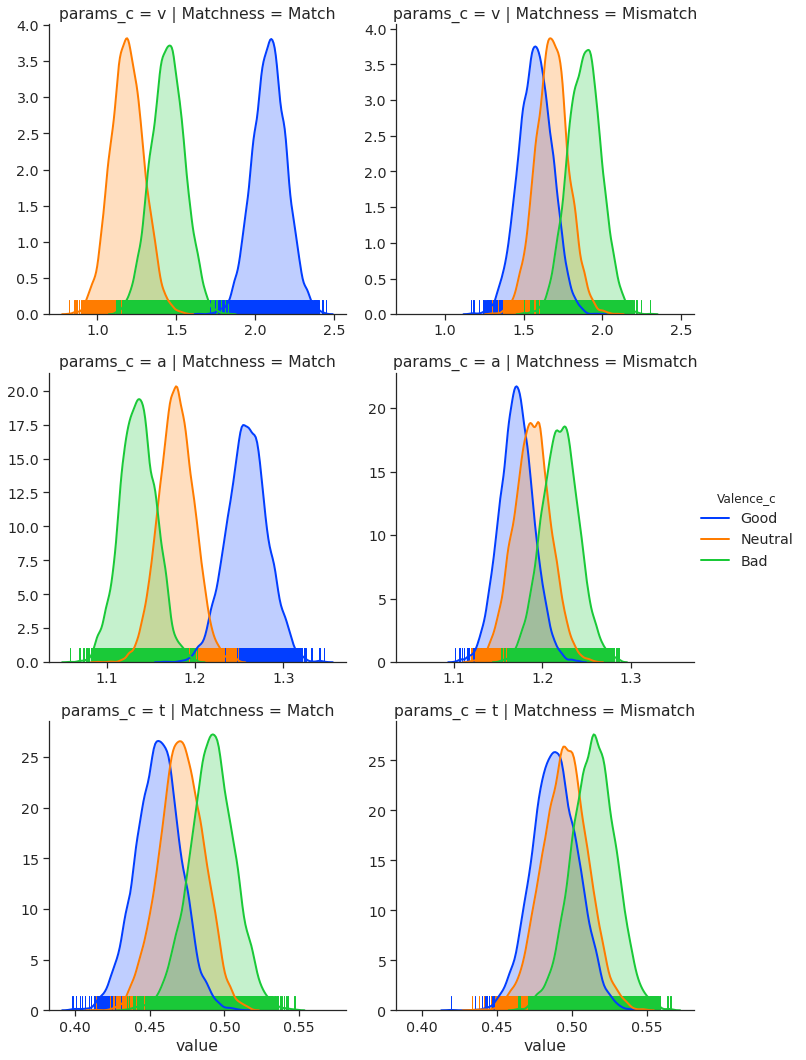

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.3)

g = sns.FacetGrid(df_melt, row='params_c', col='Matchness', hue="Valence_c", height=5, palette="bright",
                 sharex='row', sharey=False)
g = (g.map(sns.distplot, "value", hist = False, kde = True,
           kde_kws = {'shade': True, 'linewidth': 2}, rug=True)
     #.set(xlim=(0, 1.5))  # , ylim=(0, 12))
     .add_legend())

In [31]:
df_melt['cond'] = df_melt[['Matchness', 'Valence']].apply(lambda x: '_'.join(x), axis=1)
#df_melt.head(10)

# long-to-wide to plot pair-plot

tmp = df_melt
tmp['idx'] = np.tile(np.arange(0, df_melt.shape[0]/3), 3)
tmp = df_melt.pivot_table(index=['idx', 'Matchness', 'Valence', 'cond'], columns='params', values='value').reset_index()
#tmp = df_melt.pivot(index='idx', columns='params', values='value')

print(tmp.shape)
tmp.head()

(120000, 7)


params,idx,Matchness,Valence,cond,a,t,v
0,0.0,Match,Bad,Match_Bad,1.123048,0.499841,1.396718
1,1.0,Match,Bad,Match_Bad,1.144181,0.496086,1.383972
2,2.0,Match,Bad,Match_Bad,1.134392,0.509560,1.341558
3,3.0,Match,Bad,Match_Bad,1.149123,0.498767,1.427866
4,4.0,Match,Bad,Match_Bad,1.127177,0.487265,1.431471


[None, None]

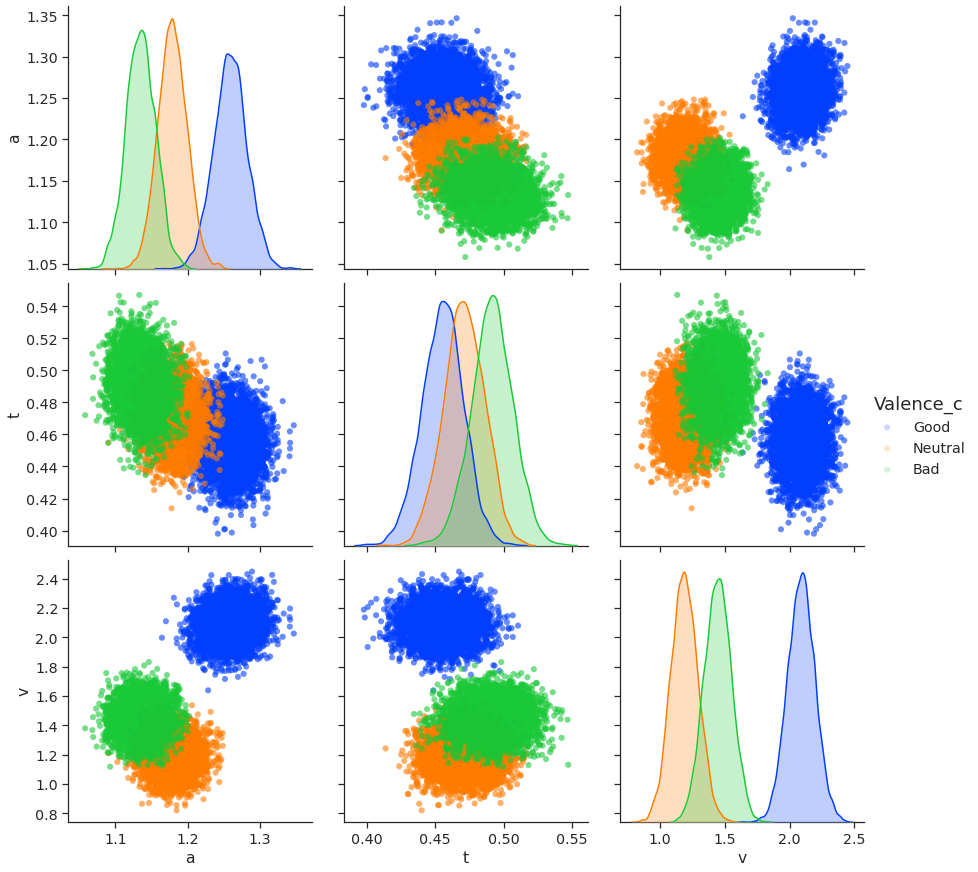

In [33]:
# pair plot
tmp_m = tmp[tmp['Matchness'] == 'Match']
tmp_m = tmp_m.drop(columns=['idx','Matchness','cond'])

tmp_m['Valence_c'] = pd.Categorical(tmp_m['Valence'], categories=['Good', 'Neutral', 'Bad'])
sns.set(style="ticks", color_codes=True, font_scale=1.3)
# , font_scale=1.3
#sns.set_style("white", {
#        "font.family": "serif",
#        "font.serif": ["Times", "Times", "Times"]
#    })
# "font.serif": ["Times", "Palatino", "serif"]
g = sns.pairplot(tmp_m, hue="Valence_c", palette="bright", 
                 plot_kws=dict(edgecolor='none', alpha=0.2),
                 height = 4) # or linewidth=0
plt.setp(g._legend.get_title(), fontsize=18)


## Exp 1c

There are 23 participant in exp 1c


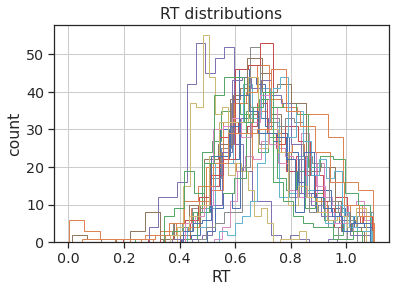

In [34]:
# load data
df1c = hddm.load_csv('df1c.v.hddm_stim.csv')

df1c.head(10)  # uncomment if you want to check the head of the data

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in df1c.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

print('There are %d participant in exp 1c' %df1c['subj_idx'].nunique())

In [38]:
# define a function to run model in parallel for experiment 1b
def run_model_1c(id):
    
    print('running model %i'%id);
    
    import hddm
    import random
    
    dbname='df1c_chain_vtaz_%i.db'%id   # define the database name, which uses pickle format
    mname = 'df1c_chain__vtaz_%i'%id    # define the name for the model
    
    df1c = hddm.load_csv('df1c.v.hddm_stim.csv')
    
    m = hddm.HDDMStimCoding(df1c, 
                            include='z', 
                            stim_col='stim', 
                            depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                            split_param='v', 
                            drift_criterion=False,
                            p_outlier=0.05)
    m.find_starting_values()
    m.sample(10000, burn=5000, thin = 5, dbname=dbname, db='pickle')
    m.save(mname) # save the model
    
    return m

In [39]:
start_time = time.time()   # the start time of the processing

from ipyparallel import Client

v = Client()[:]

jobs = v.map(run_model_1c, range(4)) # 4 is the number of chains
df1c_models = jobs.get()

print("\nRunning 4 chains used: %f seconds." % (time.time() - start_time))

# Running 4 chains used: 15342.325061 seconds.


Running 4 chains used: 6949.329601 seconds.


In [41]:
Match_R_hat_vtz = hddm.analyze.gelman_rubin(df1c_models) # get the R hat information

# save Categ_R_hat_vtz
with open('df1c_R_hat_vtaz.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())

In [42]:
df1c_grp_traces = []
for i in range(4):
    df1c_m = df1b_models[0]
    df1c_grp_trace = df1c_m.get_group_traces()
    df1c_grp_trace['chain'] = i
    print('chain', i, df1c_grp_trace.shape)
    df1c_grp_traces.append(df1c_grp_trace)
df1c_grp_traces = pd.concat(df1c_grp_traces)    
df1c_grp_traces.to_csv('df1c_group_traces.csv', index=False) # save to csv

import re

lst = ["v(", "a(", "t(", 'cha']
esc_lst = [re.escape(s) for s in lst]
pattern = '|'.join(esc_lst)

# select v, a, t, and chains
slct_columns = df1b_grp_traces.columns[df1b_grp_traces.columns.str.contains(pattern, case=False)]

df_tmp = df1b_grp_traces[slct_columns]
df_tmp.head()


chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)


,a(Match.Bad),a(Match.Good),a(Match.Neutral),a(Mismatch.Bad),a(Mismatch.Good),a(Mismatch.Neutral),v(Match.Bad),v(Match.Good),v(Match.Neutral),v(Mismatch.Bad),v(Mismatch.Good),v(Mismatch.Neutral),t(Match.Bad),t(Match.Good),t(Match.Neutral),t(Mismatch.Bad),t(Mismatch.Good),t(Mismatch.Neutral),chain
0,1.123048,1.303106,1.187505,1.225513,1.195271,1.193192,1.396718,2.188715,1.163827,1.850685,1.511123,1.664286,0.499841,0.455551,0.479585,0.537137,0.511371,0.497949,0
1,1.144181,1.289237,1.208940,1.214849,1.181688,1.147124,1.383972,2.122406,1.148205,1.828762,1.473658,1.480222,0.496086,0.451794,0.468285,0.481564,0.499840,0.502321,0
2,1.134392,1.253512,1.197616,1.222371,1.161849,1.172907,1.341558,2.214633,1.134973,1.849620,1.632115,1.618406,0.509560,0.420822,0.484708,0.507973,0.480131,0.509629,0
3,1.149123,1.234794,1.199081,1.211392,1.133689,1.169302,1.427866,2.176085,1.183502,1.704286,1.477849,1.571013,0.498767,0.459209,0.487619,0.544511,0.505498,0.501242,0
4,1.127177,1.254152,1.193641,1.204526,1.154924,1.173088,1.431471,2.088791,1.299137,2.004505,1.566851,1.543484,0.487265,0.458499,0.471735,0.548646,0.491245,0.503467,0


/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Shape of the wide format (20000, 20)
Shape of the long format (360000, 4)


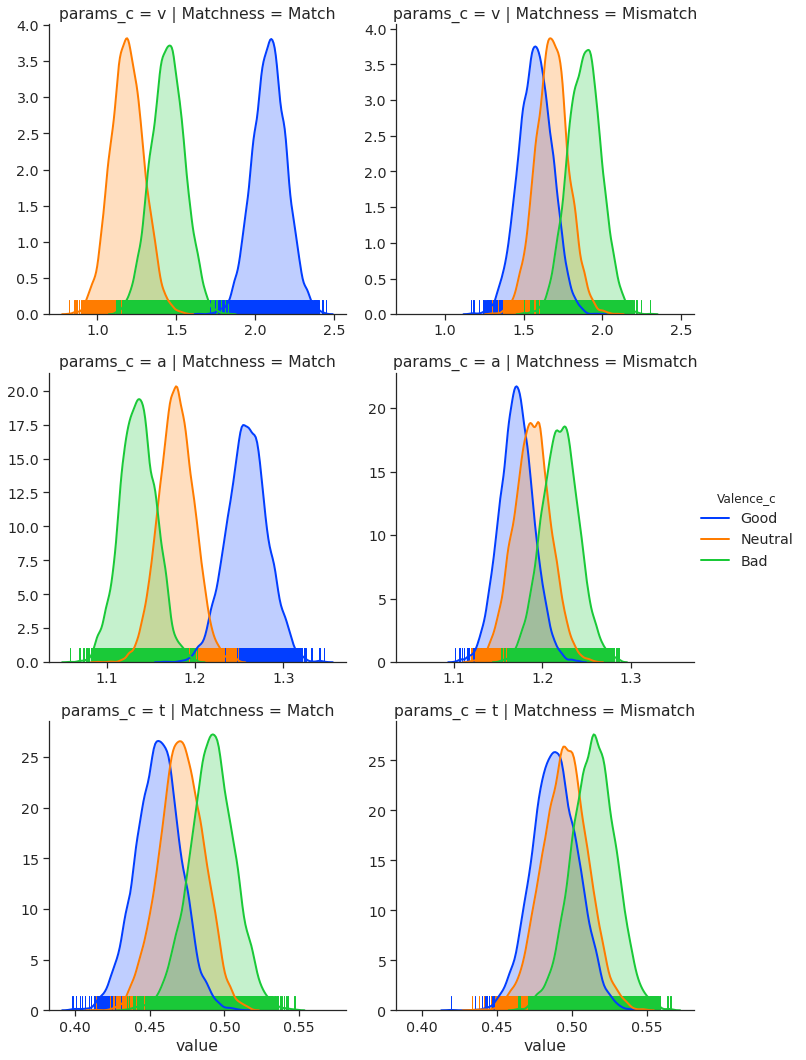

In [43]:
df_tmp["id"] = df_tmp.index
df_tmp.head()
print('Shape of the wide format', df_tmp.shape)

df_melt = pd.melt(df_tmp,
                  id_vars=['id', 'chain'],
                  value_vars=slct_columns[:-1],
                  var_name='cond',
                  value_name='value')

#type(df_melt)
print('Shape of the long format', df_melt.shape)
#print(df_melt.shape)
df_melt.head(10)

df_melt[['params','Matchness','Valence']] = pd.DataFrame(df_melt['cond'].apply(lambda x: [i for i in re.split(r'[\(\)\.]', x) if len(i)>0]).to_list())
df_melt.head()

df_melt['params_c'] = pd.Categorical(df_melt['params'], categories=['v', 'a', 't'])
df_melt['Valence_c'] = pd.Categorical(df_melt['Valence'], categories=['Good', 'Neutral', 'Bad'])
df_melt.head()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.3)

g = sns.FacetGrid(df_melt, row='params_c', col='Matchness', hue="Valence_c", height=5, palette="bright",
                 sharex='row', sharey=False)
g = (g.map(sns.distplot, "value", hist = False, kde = True,
           kde_kws = {'shade': True, 'linewidth': 2}, rug=True)
     #.set(xlim=(0, 1.5))  # , ylim=(0, 12))
     .add_legend())

### Using a for loop to run all studies with similar design

In [44]:
import glob
file_list = glob.glob("*hddm_stim.csv") # get all the file name of input
db_list = glob.glob("*ddm.db")          # get the existing database of models

# Check if the model had been run
db_names = []
for ii in range(0,len(db_list)):
    #print(ii)
    db_names.append(db_list[ii].split('_')[0])
db_names

['df1a',
 'df1b',
 'df3b',
 'df4a',
 'df4b',
 'df6b',
 'df7a',
 'df7b',
 'df1c',
 'df2',
 'df3a',
 'df5',
 'df6a']

In [49]:
exp_name = '6a'
'df' + exp_name + '_chain_vtaz_%i.db'%id 

'df6a_chain_vtaz_1.db'

In [3]:
# define a function to run model in parallel for experiment 1b
def run_model_2(id):
    import hddm
    import random
    exp_name = '2'
    print('running models %i'%id, 'for for exp', exp_name)
    dbname = 'df' + exp_name + '_chain_vtaz_%i.db'%id   # define the database name, which uses pickle format
    mname  = 'df' + exp_name + '_chain__vtaz_%i'%id     # define the name for the model
    fname  = 'df' + exp_name + '.v.hddm_stim.csv'
    df = hddm.load_csv(fname)
    m = hddm.HDDMStimCoding(df, 
                            include='z', 
                            stim_col='stim', 
                            depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                            split_param='v', 
                            drift_criterion=False,
                            p_outlier=0.05)
    m.find_starting_values()
    m.sample(10000, burn=5000, thin = 5, dbname=dbname, db='pickle')
    m.save(mname) # save the model
    return m

def run_model_6a(id):
    import hddm
    import random
    exp_name = '6a'
    print('running models %i'%id, 'for for exp', exp_name)
    dbname = 'df' + exp_name + '_chain_vtaz_%i.db'%id   # define the database name, which uses pickle format
    mname  = 'df' + exp_name + '_chain__vtaz_%i'%id     # define the name for the model
    fname  = 'df' + exp_name + '.v.hddm_stim.csv'
    df = hddm.load_csv(fname)
    m = hddm.HDDMStimCoding(df, 
                            include='z', 
                            stim_col='stim', 
                            depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                            split_param='v', 
                            drift_criterion=False,
                            p_outlier=0.05)
    m.find_starting_values()
    m.sample(10000, burn=5000, thin = 5, dbname=dbname, db='pickle')
    m.save(mname) # save the model
    return m

In [5]:
exp_list = ['2', '6a']
for mm in range(len(exp_list)):
    if mm == 0:
        print('run model for exp', exp_list[mm])
        
        start_time = time.time()   # the start time of the processing#

        from ipyparallel import Client

        v = Client()[:]

        jobs = v.map(run_model_2, range(4)) # 4 is the number of chains
        df1c_models = jobs.get()

        print("\nRunning 4 chains for exp", exp_list[mm], "used: %f seconds." % (time.time() - start_time))
        
    elif mm == 1:
        print('run model for exp', exp_list[mm])

        start_time = time.time()   # the start time of the processing#

        from ipyparallel import Client

        v = Client()[:]

        jobs = v.map(run_model_6a, range(4)) # 4 is the number of chains
        df1c_models = jobs.get()

        print("\nRunning 4 chains for exp", exp_list[mm], "used: %f seconds." % (time.time() - start_time))

run model for exp 2

Running 4 chains for exp 2 used: 9937.488912 seconds.
run model for exp 6a

Running 4 chains for exp 6a used: 7658.596988 seconds.


In [3]:
# Loading the existing model data
df1c_models = []
for id in range(4):
#    print('\nProcessing Model ', i)
    mname = 'df1c_chain__vtaz_%i'%id
    m_stim = hddm.load(mname)
    df1c_models.append(m_stim)

In [4]:
Match_R_hat_vtz = hddm.analyze.gelman_rubin(df1c_models) # get the R hat information

# save Categ_R_hat_vtz
with open('df1c_R_hat_full_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())

chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Shape of the wide format (4000, 20)
Shape of the long format (72000, 4)


/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


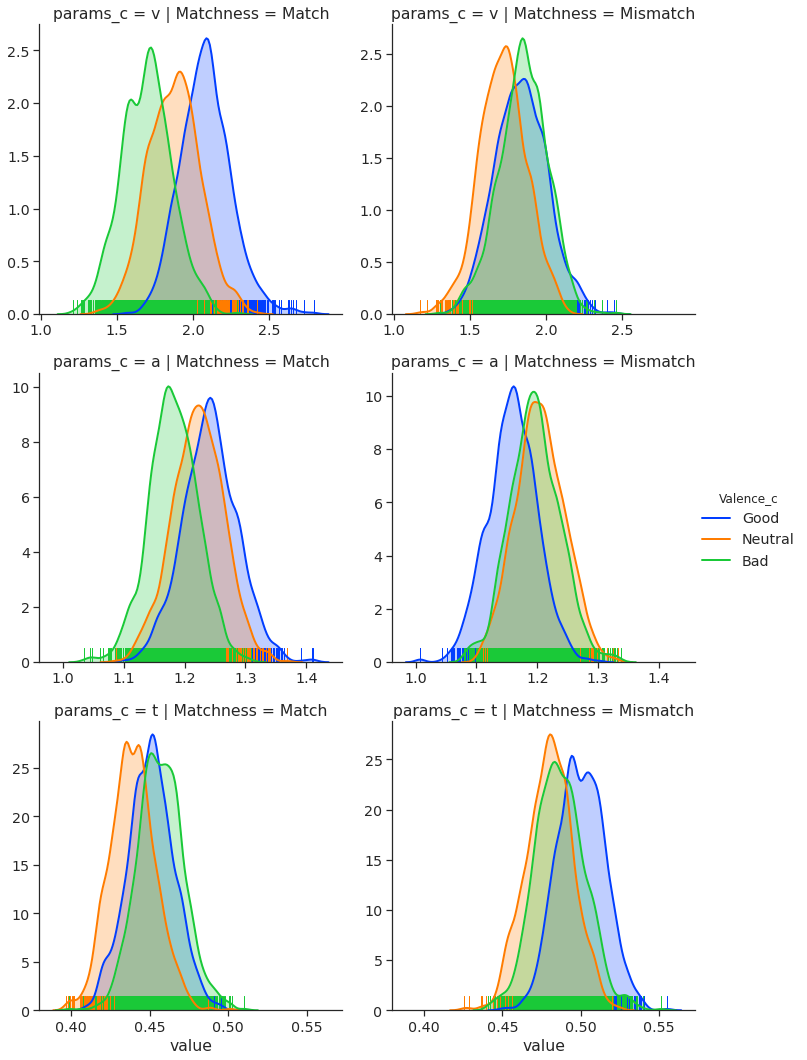

In [7]:
df1c_grp_traces = []
for i in range(4):
    df1c_m = df1c_models[0]
    df1c_grp_trace = df1c_m.get_group_traces()
    df1c_grp_trace['chain'] = i
    print('chain', i, df1c_grp_trace.shape)
    df1c_grp_traces.append(df1c_grp_trace)
df1c_grp_traces = pd.concat(df1c_grp_traces)    
df1c_grp_traces.to_csv('df1c_group_traces.csv', index=False) # save to csv


import re

lst = ["v(", "a(", "t(", 'cha']
esc_lst = [re.escape(s) for s in lst]
pattern = '|'.join(esc_lst)

# select v, a, t, and chains
slct_columns = df1c_grp_traces.columns[df1c_grp_traces.columns.str.contains(pattern, case=False)]

df_tmp = df1c_grp_traces[slct_columns]
df_tmp.head()

df_tmp["id"] = df_tmp.index
df_tmp.head()
print('Shape of the wide format', df_tmp.shape)

# wide-to-long
df_melt = pd.melt(df_tmp,
                  id_vars=['id', 'chain'],
                  value_vars=slct_columns[:-1],
                  var_name='cond',
                  value_name='value')

print('Shape of the long format', df_melt.shape)
#print(df_melt.shape)
df_melt.head(10)

# split condition info to three columns
df_melt[['params','Matchness','Valence']] = pd.DataFrame(df_melt['cond'].apply(lambda x: [i for i in re.split(r'[\(\)\.]', x) if len(i)>0]).to_list())
df_melt.head()

# string to categorical data, for plotting
df_melt['params_c'] = pd.Categorical(df_melt['params'], categories=['v', 'a', 't'])
df_melt['Valence_c'] = pd.Categorical(df_melt['Valence'], categories=['Good', 'Neutral', 'Bad'])
df_melt.head()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.3)

g = sns.FacetGrid(df_melt, row='params_c', col='Matchness', hue="Valence_c", height=5, palette="bright",
                 sharex='row', sharey=False)
g = (g.map(sns.distplot, "value", hist = False, kde = True,
           kde_kws = {'shade': True, 'linewidth': 2}, rug=True)
     #.set(xlim=(0, 1.5))  # , ylim=(0, 12))
     .add_legend())

(24000, 7)


[None, None]

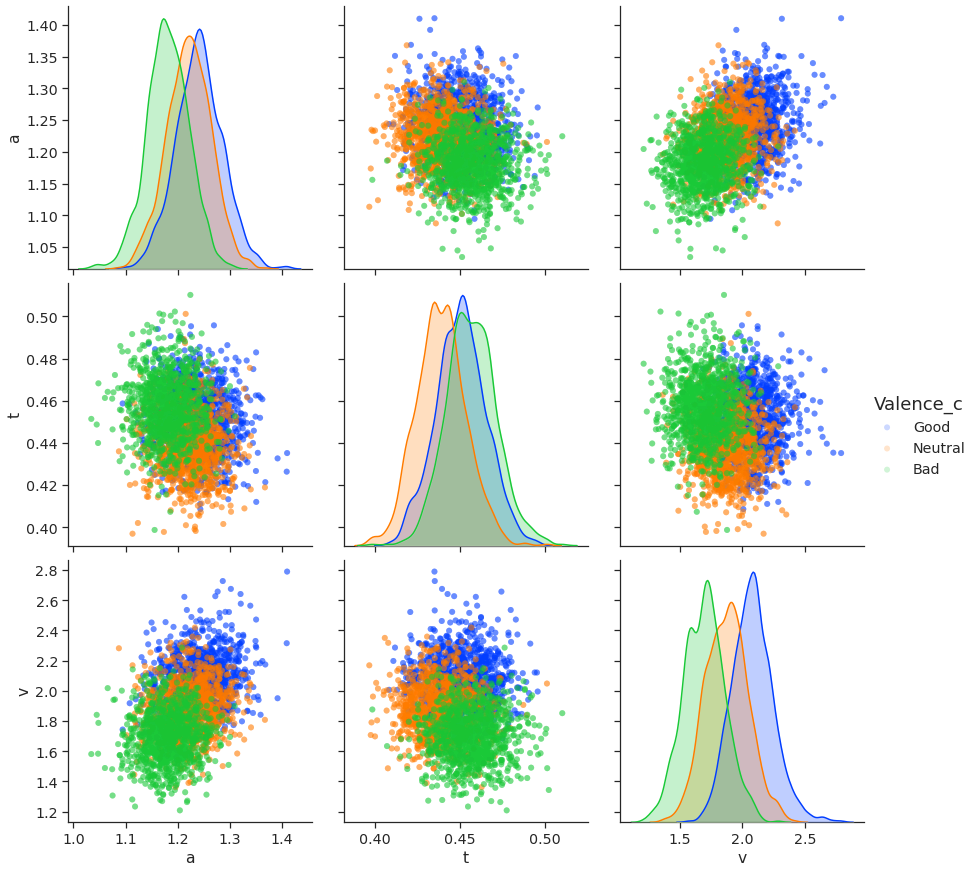

In [11]:
df_melt['cond'] = df_melt[['Matchness', 'Valence']].apply(lambda x: '_'.join(x), axis=1)
#df_melt.head(10)

# long-to-wide to plot pair-plot

tmp = df_melt
tmp['idx'] = np.tile(np.arange(0, df_melt.shape[0]/3), 3)
tmp = df_melt.pivot_table(index=['idx', 'Matchness', 'Valence', 'cond'], columns='params', values='value').reset_index()
#tmp = df_melt.pivot(index='idx', columns='params', values='value')

print(tmp.shape)
#tmp.head()

# pair plot
tmp_m = tmp[tmp['Matchness'] == 'Match']
tmp_m = tmp_m.drop(columns=['idx','Matchness','cond'])

tmp_m['Valence_c'] = pd.Categorical(tmp_m['Valence'], categories=['Good', 'Neutral', 'Bad'])
#tmp_m['params'] = pd.Categorical(tmp_m['params'], categories=['v', 'a', 't'])

sns.set(style="ticks", color_codes=True, font_scale=1.3)
# , font_scale=1.3
#sns.set_style("white", {
#        "font.family": "serif",
#        "font.serif": ["Times", "Times", "Times"]
#    })
# "font.serif": ["Times", "Palatino", "serif"]
g = sns.pairplot(tmp_m, hue="Valence_c", palette="bright", 
                 plot_kws=dict(edgecolor='none', alpha=0.2),
                 height = 4) # or linewidth=0
plt.setp(g._legend.get_title(), fontsize=18)

In [12]:
# Loading the existing model data
df6a_models = []
for id in range(4):
#    print('\nProcessing Model ', i)
    mname = 'df6a_chain__vtaz_%i'%id
    m_stim = hddm.load(mname)
    df6a_models.append(m_stim)

In [13]:
Match_R_hat_vtz = hddm.analyze.gelman_rubin(df6a_models) # get the R hat information

# save Categ_R_hat_vtz
with open('df6a_R_hat_full_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())

chain 0 (1000, 24)
chain 1 (1000, 24)
chain 2 (1000, 24)
chain 3 (1000, 24)
Shape of the wide format (4000, 20)
Shape of the long format (72000, 4)


/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


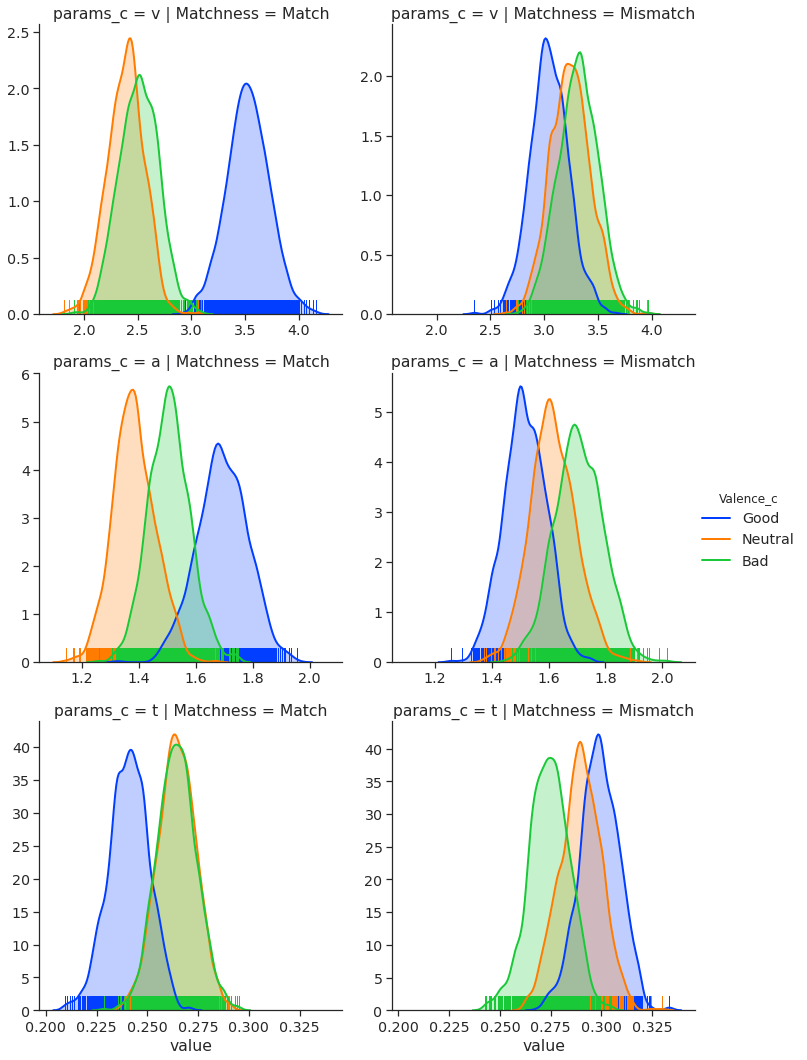

In [14]:
df6a_grp_traces = []
for i in range(4):
    df6a_m = df6a_models[0]
    df6a_grp_trace = df6a_m.get_group_traces()
    df6a_grp_trace['chain'] = i
    print('chain', i, df6a_grp_trace.shape)
    df6a_grp_traces.append(df6a_grp_trace)
df6a_grp_traces = pd.concat(df6a_grp_traces)    
df6a_grp_traces.to_csv('df6a_group_traces.csv', index=False) # save to csv


import re

lst = ["v(", "a(", "t(", 'cha']
esc_lst = [re.escape(s) for s in lst]
pattern = '|'.join(esc_lst)

# select v, a, t, and chains
slct_columns = df6a_grp_traces.columns[df6a_grp_traces.columns.str.contains(pattern, case=False)]

df_tmp = df6a_grp_traces[slct_columns]
df_tmp.head()

df_tmp["id"] = df_tmp.index
df_tmp.head()
print('Shape of the wide format', df_tmp.shape)

# wide-to-long
df_melt = pd.melt(df_tmp,
                  id_vars=['id', 'chain'],
                  value_vars=slct_columns[:-1],
                  var_name='cond',
                  value_name='value')

print('Shape of the long format', df_melt.shape)
#print(df_melt.shape)
df_melt.head(10)

# split condition info to three columns
df_melt[['params','Matchness','Valence']] = pd.DataFrame(df_melt['cond'].apply(lambda x: [i for i in re.split(r'[\(\)\.]', x) if len(i)>0]).to_list())
df_melt.head()

# string to categorical data, for plotting
df_melt['params_c'] = pd.Categorical(df_melt['params'], categories=['v', 'a', 't'])
df_melt['Valence_c'] = pd.Categorical(df_melt['Valence'], categories=['Good', 'Neutral', 'Bad'])
df_melt.head()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.3)

g = sns.FacetGrid(df_melt, row='params_c', col='Matchness', hue="Valence_c", height=5, palette="bright",
                 sharex='row', sharey=False)
g = (g.map(sns.distplot, "value", hist = False, kde = True,
           kde_kws = {'shade': True, 'linewidth': 2}, rug=True)
     #.set(xlim=(0, 1.5))  # , ylim=(0, 12))
     .add_legend())

(24000, 7)


[None, None]

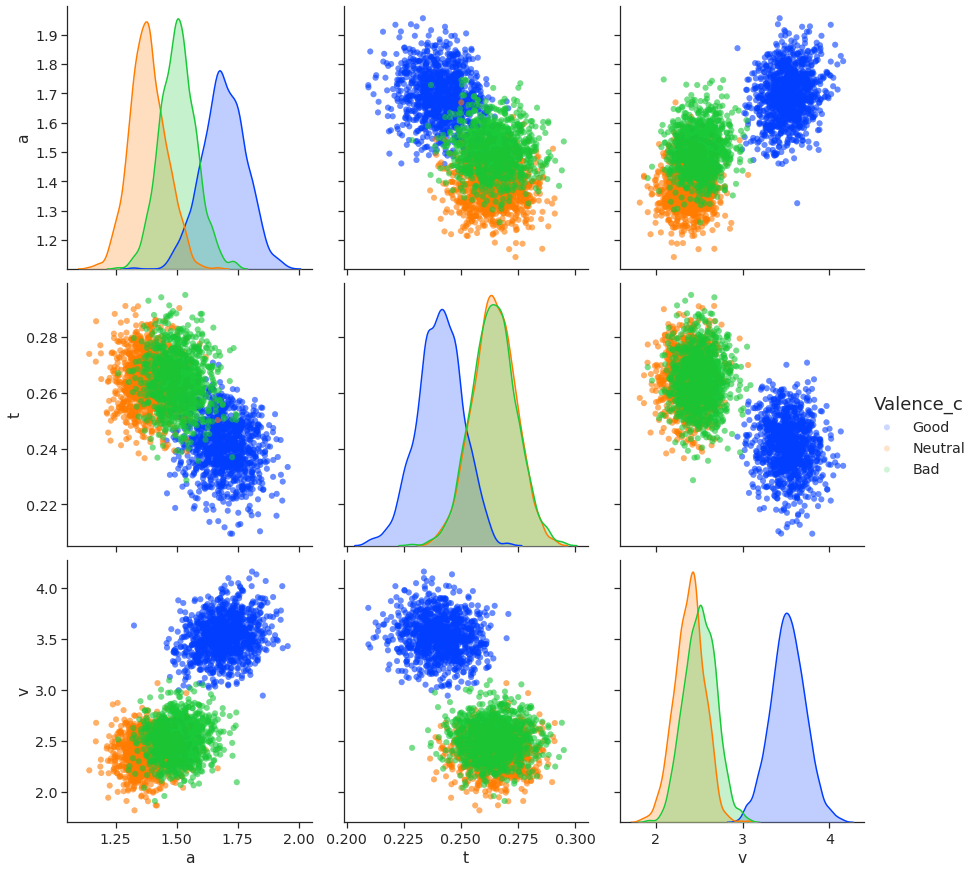

In [15]:
df_melt['cond'] = df_melt[['Matchness', 'Valence']].apply(lambda x: '_'.join(x), axis=1)
#df_melt.head(10)

# long-to-wide to plot pair-plot

tmp = df_melt
tmp['idx'] = np.tile(np.arange(0, df_melt.shape[0]/3), 3)
tmp = df_melt.pivot_table(index=['idx', 'Matchness', 'Valence', 'cond'], columns='params', values='value').reset_index()
#tmp = df_melt.pivot(index='idx', columns='params', values='value')

print(tmp.shape)
#tmp.head()

# pair plot
tmp_m = tmp[tmp['Matchness'] == 'Match']
tmp_m = tmp_m.drop(columns=['idx','Matchness','cond'])

tmp_m['Valence_c'] = pd.Categorical(tmp_m['Valence'], categories=['Good', 'Neutral', 'Bad'])
#tmp_m['params'] = pd.Categorical(tmp_m['params'], categories=['v', 'a', 't'])

sns.set(style="ticks", color_codes=True, font_scale=1.3)
# , font_scale=1.3
#sns.set_style("white", {
#        "font.family": "serif",
#        "font.serif": ["Times", "Times", "Times"]
#    })
# "font.serif": ["Times", "Palatino", "serif"]
g = sns.pairplot(tmp_m, hue="Valence_c", palette="bright", 
                 plot_kws=dict(edgecolor='none', alpha=0.2),
                 height = 4) # or linewidth=0
plt.setp(g._legend.get_title(), fontsize=18)